<a href="https://colab.research.google.com/github/supersahib/mnist-digit-classifier/blob/main/neural_network_MNIST_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.75MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.26MB/s]


**transform = transforms.ToTensor()**

A transformation function that converts data to PyTorch tensors
Also normalizes pixel values from [0, 255] to [0.0, 1.0]
Converts from PIL Image or numpy array to PyTorch tensor format

Why we need this:

MNIST images are originally stored as PIL Images or numpy arrays
PyTorch neural networks expect tensor inputs
The normalization helps with training stability

**torchvision.datasets.MNIST(...)**

Let's break down each parameter:

root='./data' - Where to store/look for the dataset files

train=True - Get the training set (vs test set)

download=True - Download if not already present

transform=transform - Apply our ToTensor transformation

In [ ]:
print(f"Dataset size: {len(train_dataset)}")
print(f"First sample type: {type(train_dataset[0])}")

Dataset size: 60000
First sample type: <class 'tuple'>


In [ ]:
sample = train_dataset[0]
print(f"Tuple length: {len(sample)}")
print(f"First element type: {type(sample[0])}")
print(f"First element shape: {sample[0].shape}")
print(f"Second element type: {type(sample[1])}")
print(f"Second element value: {sample[1]}")

Tuple length: 2
First element type: <class 'torch.Tensor'>
First element shape: torch.Size([1, 28, 28])
Second element type: <class 'int'>
Second element value: 5


Above you can see that tuple length is 2 --> First element is the image (as a tensor) and 2nd is the label (what the digit actually is)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=784, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=16)
        self.layer3 = nn.Linear(in_features=16, out_features=10)

        # Define your layers: 784 → 16 → 16 → 10

    def forward(self, x):
        # x shape: [batch_size, 1, 28, 28]
        x = torch.flatten(x, start_dim=1)  # → [batch_size, 784]

        # Step 2: Apply first layer + activation
        x = self.layer1(x)  # self.layer1(x), but what activation?
        x = torch.sigmoid(x)

        # Step 3: Apply second layer + activation
        x = self.layer2(x)
        x = torch.sigmoid(x)

        # Step 4: Apply output layer (no activation needed)
        x = self.layer3(x)
        return x

**Creating the DataLoader for Batching**

In [ ]:
from torch.utils.data import DataLoader

model = NeuralNetwork()

trainLoader = DataLoader(train_dataset, batch_size = 32, shuffle=True)

Why These Settings:

batch_size=32: Good balance of memory usage and training stability

shuffle=True: Prevents model from learning order patterns, improves generalization

# Testing the Network

In [ ]:
# Get one batch for testing
batch_images, batch_labels = next(iter(trainLoader))
print(f"Batch images shape: {batch_images.shape}")    # [32, 1, 28, 28]
print(f"Batch labels shape: {batch_labels.shape}")

# Test forward pass (no gradient computation needed)
with torch.no_grad():
    predictions = model(batch_images)
    print(f"Predictions shape: {predictions.shape}")   # [32, 10]
    print(f"Sample prediction: {predictions[0]}")
    print(f"Sample label: {batch_labels[0]}")

Batch images shape: torch.Size([32, 1, 28, 28])
Batch labels shape: torch.Size([32])
Predictions shape: torch.Size([32, 10])
Sample prediction: tensor([-0.3778, -0.2876,  0.3419, -0.5862, -0.0384,  0.1087, -0.1040,  0.0047,
         0.2877,  0.4011])
Sample label: 6


What next(iter(train_loader)) does:

Gets the first batch from DataLoader
Returns tuple: (batch_of_images, batch_of_labels)

Expected Output Shapes:

Input: [32, 1, 28, 28] → 32 grayscale 28x28 images
Output: [32, 10] → 32 predictions, each with 10 digit scores

Note: Raw prediction scores can be any real numbers (positive/negative). Later we'll convert these to probabilities.

# **Next Steps: Training Process**

Now we need to teach the network to give better predictions. This requires:

Loss Function - How do we measure "how wrong" the predictions are?
Optimizer - How do we update weights to reduce the loss?

Training Loop - Repeat: forward pass → calculate loss → update weights

For each batch:

Feed batch → Get predictions
Calculate loss → Compare predictions vs true labels
Compute gradients → How should weights change?
Update weights → Actually adjust the weights
Move to next batch → Repeat

Then repeat for all batches = 1 epoch
Then repeat for multiple epochs


**Cross entropy Loss Function**

In [ ]:
import torch.nn.functional as F

loss = F.cross_entropy(predictions, batch_labels)

In [ ]:
  # Get one batch for testing
batch_images, batch_labels = next(iter(trainLoader))
print(f"Batch images shape: {batch_images.shape}")    # [32, 1, 28, 28]
print(f"Batch labels shape: {batch_labels.shape}")

# Test forward pass (no gradient computation needed)
with torch.no_grad():
    predictions = model(batch_images)
    print(f"Predictions shape: {predictions.shape}")   # [32, 10]
    print(f"Sample prediction: {predictions[0]}")
    print(f"Sample label: {batch_labels[0]}")

    # Calculate loss
    loss = F.cross_entropy(predictions, batch_labels)
    print(f"Loss value: {loss.item()}")


    #backpropagation - gradients are stored internally in our model parameters
    loss.backward()

    #Optimizing loss with Gradient Descent
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    optimizer.step()


Batch images shape: torch.Size([32, 1, 28, 28])
Batch labels shape: torch.Size([32])
Predictions shape: torch.Size([32, 10])
Sample prediction: tensor([-0.3760, -0.2918,  0.3439, -0.5829, -0.0457,  0.1135, -0.1046,  0.0087,
         0.2854,  0.3991])
Sample label: 0
Loss value: 2.3533809185028076


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 5
epoch_losses = []
batch_losses = []
batch_numbers = []
for epoch in range(num_epochs):
    running_loss = 0.0
    epoch_batch_count = 0         # Repeat entire dataset
    for batch_idx, (batch_images, batch_labels) in enumerate(trainLoader):
        # Training steps for each batch
        optimizer.zero_grad()  # Clear old gradients
        predictions = model(batch_images)
        loss = F.cross_entropy(predictions, batch_labels)
        loss.backward()
        optimizer.step()

        #track losses
        batch_losses.append(loss.item())
        batch_numbers.append(epoch * len(trainLoader) + batch_idx)
        running_loss += loss.item()
        epoch_batch_count += 1

    # Calculate average loss for epoch
    avg_epoch_loss = running_loss / epoch_batch_count
    epoch_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1} complete - Average Loss: {avg_epoch_loss:.4f}")

Epoch 1 complete - Average Loss: 0.8054
Epoch 2 complete - Average Loss: 0.7338
Epoch 3 complete - Average Loss: 0.6738
Epoch 4 complete - Average Loss: 0.6230
Epoch 5 complete - Average Loss: 0.5804


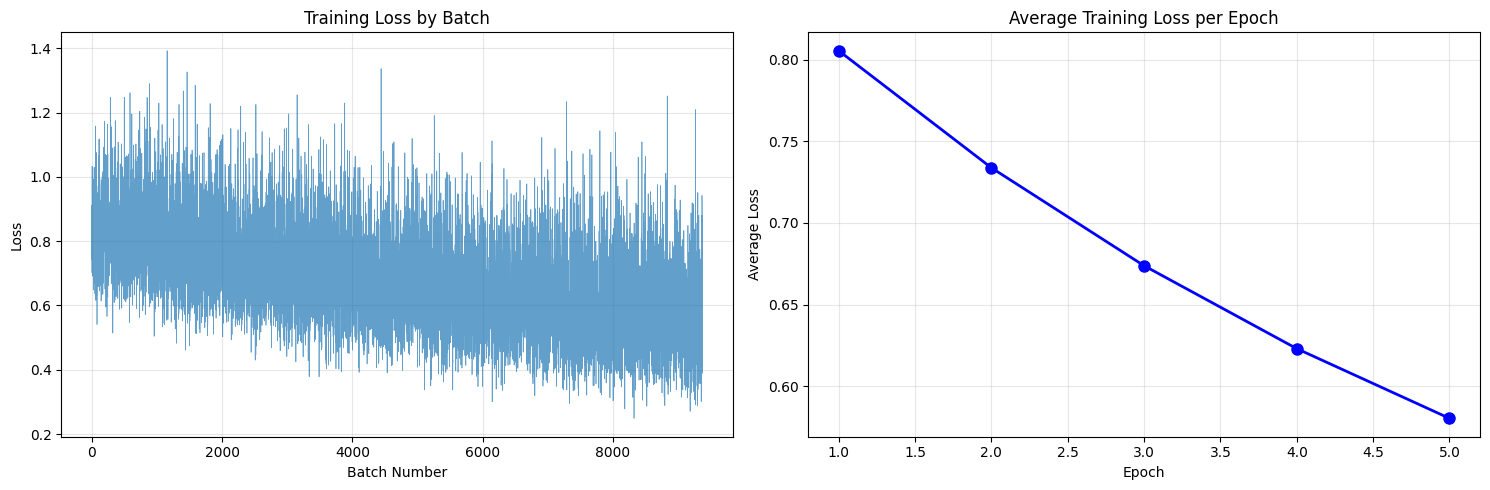

Starting loss: 0.7608
Final loss: 0.8416
Total improvement: -0.0808


In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Batch-by-batch loss (detailed view)
ax1.plot(batch_numbers, batch_losses, alpha=0.7, linewidth=0.5)
ax1.set_xlabel('Batch Number')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss by Batch')
ax1.grid(True, alpha=0.3)

# Plot 2: Average loss per epoch (summary view)
ax2.plot(range(1, len(epoch_losses)+1), epoch_losses, 'bo-', linewidth=2, markersize=8)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Average Loss')
ax2.set_title('Average Training Loss per Epoch')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final statistics
print(f"Starting loss: {batch_losses[0]:.4f}")
print(f"Final loss: {batch_losses[-1]:.4f}")
print(f"Total improvement: {batch_losses[0] - batch_losses[-1]:.4f}")

Testing our NN accuracy

In [ ]:
# Load test data (unseen during training)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate accuracy on test set
model.eval()  # Important: puts model in evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No gradients needed for testing
    for batch_images, batch_labels in test_loader:
        predictions = model(batch_images)
        predicted_classes = torch.argmax(predictions, dim=1)  # Get highest scoring class
        total += batch_labels.size(0)
        correct += (predicted_classes == batch_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Test Accuracy: 0.8573 (85.73%)


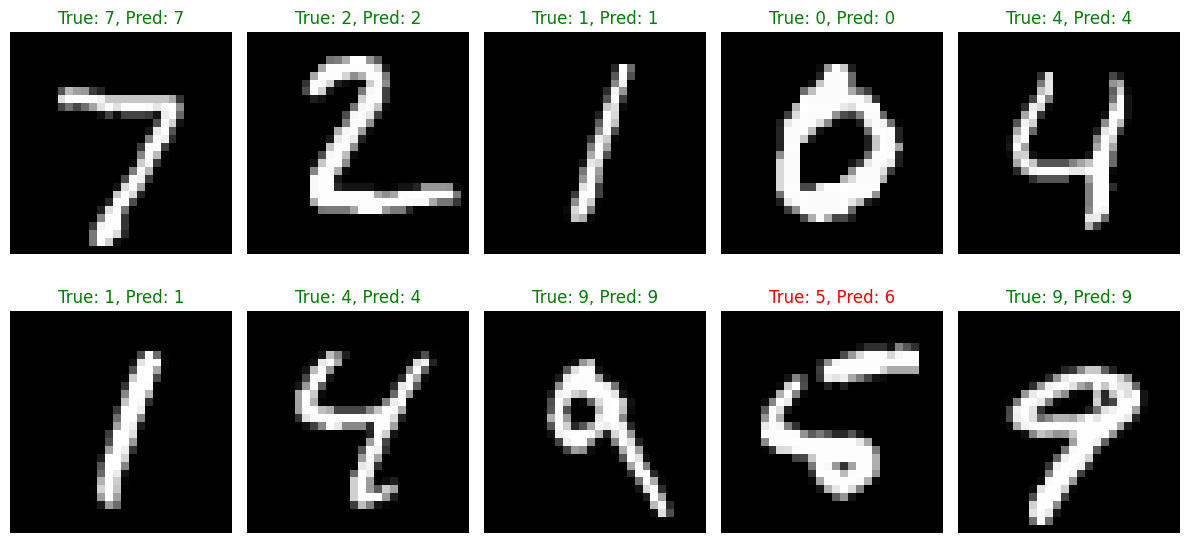

In [ ]:
# Get a batch of test images
test_images, test_labels = next(iter(test_loader))

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(test_images)
    predicted_classes = torch.argmax(predictions, dim=1)

# Visualize first 10 predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    image = test_images[i].squeeze()  # Remove channel dimension for display
    true_label = test_labels[i].item()
    pred_label = predicted_classes[i].item()

    axes[i].imshow(image, cmap='gray')

    # Color: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()